# Laboratorio 8: Clasificador Naive Bayes
*Instrucciones*
*Parte I.* 

#### Programa y valida el Clasificador Naïve Bayes, valídalo con 3 datasets y los siguientes métodos de validación. 

    -Hold-Out 70/30 estratificado
    -10-Fold Cross-Validation estratificado
    -Leave-One-Out.

*Medidas de desempeño:*

    -Accuracy
    -Matriz de Confusión


### Metodología
1.*Comenzaremos haciendo un EDA robusto de la información y a preprocesar las columnas del dataset.* 

**Este EDA será más robusto que los otros 2 para estudiar bien y tener en cuenta la independencia y correlación entre columnas que es vital como requerimiento del modelo**

2.*Entrenaremos cada dataset de forma general con la clase programada en validators.py y los 3 métodos de validación*

3.*Obtendremos medidas de desempeño solicitadas* 

### Banking Dataset 

In [1]:
import pandas as pd
import warnings

warnings.filterwarnings('ignore')

# Cargar los datos y asignar la primera fila como nombres de columna en una sola línea
data = pd.read_csv('Banking_train.csv', header=0, sep=';')


# Separar la variable objetivo 'y' del resto de las columnas
y = data['y']
X = data.drop(['y'], axis=1)

X.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown


In [2]:
#Verificamos Valores nulos en el dataset 
totalnull= data.isnull().sum().sum()
print("Valores nulos: " , totalnull)
data.info()

Valores nulos:  0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


<Axes: title={'center': 'Correlation Matrix'}>

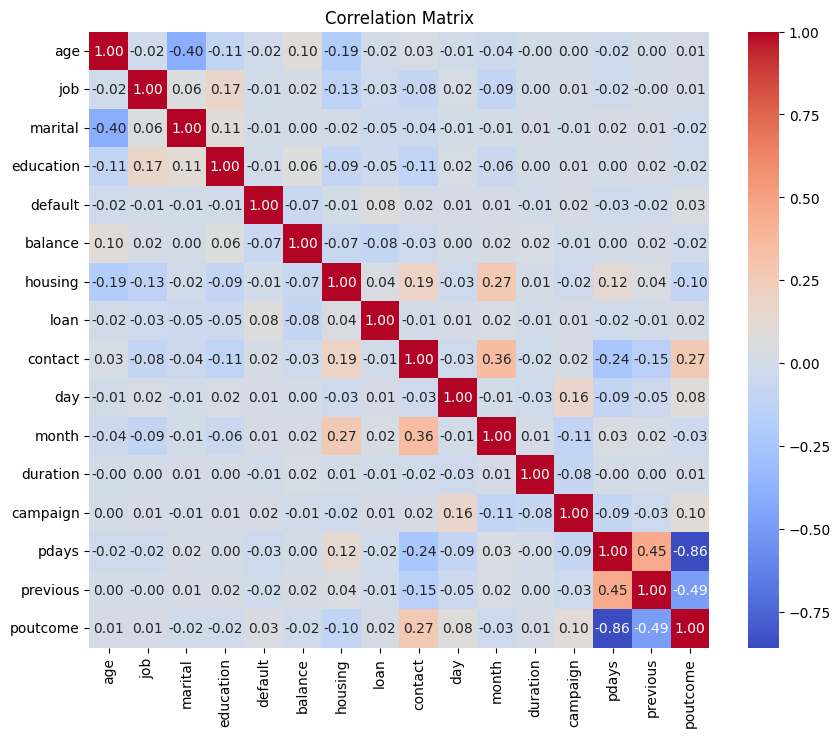

In [3]:
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt


#tratamos variables categoricas en numéricas segun sus labels 
label_encoders= {}

for column in X.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X[column] = le.fit_transform(X[column])
    label_encoders[column] = le

#mostramos la matriz de correlación entre columnas para analizar si alguna es demasiado correlacionada 
# y/o aporta información relevante
plt.figure(figsize=(10, 8))
plt.title('Correlation Matrix')

sns.heatmap(X.corr(), annot=True, cmap='coolwarm', fmt='.2f')


*Aquí se puede apreciar como pdays, previous y poutcome tienen un gran coeficiente de correlación entre sí, lo cual tiene sentido a priori según la explicación de columnas del dataset.*

Desempeño Hold-Out estratificado 70-30
Accuracy (Hold-Out): 0.8372161604246535


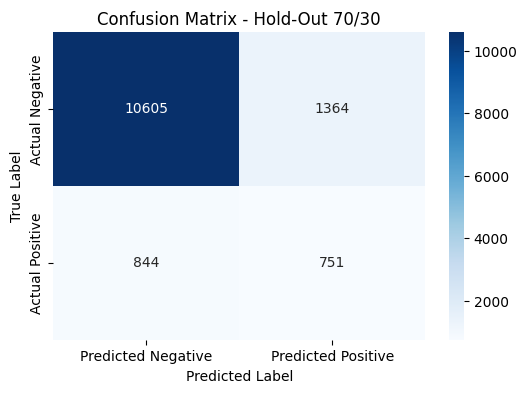

Fold 1 Accuracy: 0.8325961963732862
Fold 2 Accuracy: 0.836098208360982
Fold 3 Accuracy: 0.8378677283786773
Fold 4 Accuracy: 0.8316744083167441
Fold 5 Accuracy: 0.8314532183145322
Fold 6 Accuracy: 0.8398584383985844
Fold 7 Accuracy: 0.8372041583720415
Fold 8 Accuracy: 0.8480424684804246
Fold 9 Accuracy: 0.8400796284007963
Fold 10 Accuracy: 0.825038708250387
Average Accuracy (Stratified 10-Fold): 0.8359913161646455


In [4]:
from sklearn.naive_bayes import GaussianNB
from validators import ValidationMethods
gnb = GaussianNB()
val = ValidationMethods(X, y)   # llamamos a la clase con metodos de validación y entrenamiento
val.holdout(gnb)
val.stratified_k_fold(gnb, 10)
''' 
Este dataset es demasiado grande,
tiene mas de 45,000 registros por lo que fue costoso computacionalmente y no obtuve resultados despues de 1h 
'''
# val.leave_one_out(gnb)      

In [5]:
import seaborn as sns
df  = sns.load_dataset('titanic')

# Eliminar columnas irrelevantes
df = df.drop(['deck', 'embark_town', 'alive', 'class', 'who', 'adult_male', 'alone'], axis=1)
# Verificar valores nulos
print("Valores nulos antes:\n\n\n", df.isnull().sum())

# Imputar la mediana para 'age'
df['age'].fillna(df['age'].median(), inplace=True)
# Imputar la moda para 'embarked'
df['embarked'].fillna(df['embarked'].mode()[0], inplace=True)

#comprobar que ya no hay v. nulos 
print("Valores nulos después:\n", df.isnull().sum())
X, y = df.drop('survived', axis=1), df['survived']

Valores nulos antes:


 survived      0
pclass        0
sex           0
age         177
sibsp         0
parch         0
fare          0
embarked      2
dtype: int64
Valores nulos después:
 survived    0
pclass      0
sex         0
age         0
sibsp       0
parch       0
fare        0
embarked    0
dtype: int64


In [6]:
label_encoders= {}

for column in X.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X[column] = le.fit_transform(X[column])
    label_encoders[column] = le

Desempeño Hold-Out estratificado 70-30
Accuracy (Hold-Out): 0.7873134328358209


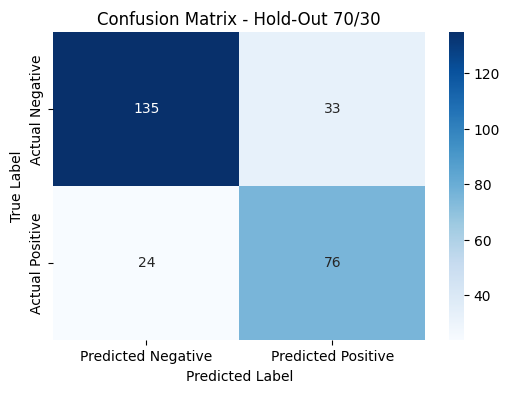

Fold 1 Accuracy: 0.8333333333333334
Fold 2 Accuracy: 0.8202247191011236
Fold 3 Accuracy: 0.797752808988764
Fold 4 Accuracy: 0.8651685393258427
Fold 5 Accuracy: 0.7528089887640449
Fold 6 Accuracy: 0.7640449438202247
Fold 7 Accuracy: 0.7191011235955056
Fold 8 Accuracy: 0.797752808988764
Fold 9 Accuracy: 0.7640449438202247
Fold 10 Accuracy: 0.7640449438202247
Average Accuracy (Stratified 10-Fold): 0.7878277153558053
Average Accuracy (Leave-One-Out): 0.7856341189674523


In [7]:
from sklearn.naive_bayes import GaussianNB
from validators import ValidationMethods
gnb = GaussianNB()
titanic = ValidationMethods(X, y)
titanic.holdout(gnb)
titanic.stratified_k_fold(gnb, 10)
titanic.leave_one_out(gnb)

In [24]:
df = sns.load_dataset('iris')

X = df.drop(columns=['species']) 
y = df['species']  

# Descripción estadística de las características numéricas
print(df.describe())


       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333
std        0.828066     0.435866      1.765298     0.762238
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


Desempeño Hold-Out estratificado 70-30
Accuracy (Hold-Out): 1.0


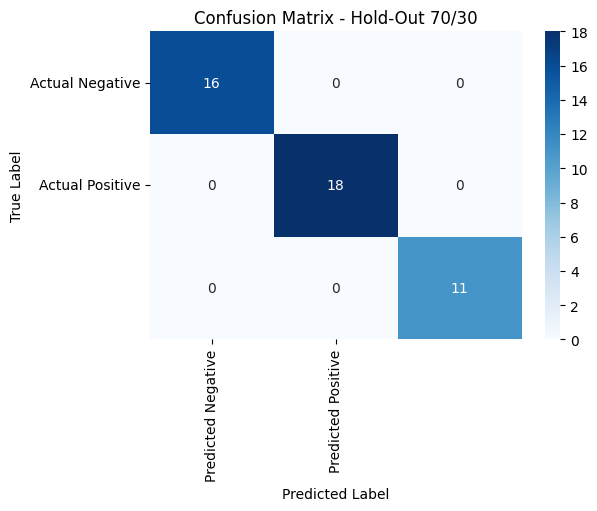

Fold 1 Accuracy: 1.0
Fold 2 Accuracy: 0.9333333333333333
Fold 3 Accuracy: 0.9333333333333333
Fold 4 Accuracy: 1.0
Fold 5 Accuracy: 0.9333333333333333
Fold 6 Accuracy: 0.9333333333333333
Fold 7 Accuracy: 0.9333333333333333
Fold 8 Accuracy: 1.0
Fold 9 Accuracy: 0.8666666666666667
Fold 10 Accuracy: 1.0
Average Accuracy (Stratified 10-Fold): 0.9533333333333334
Average Accuracy (Leave-One-Out): 0.9533333333333334


In [25]:
from sklearn.naive_bayes import GaussianNB
from validators import ValidationMethods
gnb = GaussianNB()
iris = ValidationMethods(X, y)
iris.holdout(gnb)
iris.stratified_k_fold(gnb, 10)
iris.leave_one_out(gnb)